# Healthylife insurance charge prediction - Project 2

## Problem Statement
HealthyLife is a leading insurance company headquartered in New York City, serving customers nationwide with a range of insurance policies, including health, auto, and life insurance. Currently, the company relies on traditional methods to assess insurance charges based on customer details such as age, sex, and BMI. However, they face challenges in accurately predicting insurance charges due to limited insights into how different customer attributes impact premiums. This uncertainty leads to potential underpricing or overpricing of policies, affecting both profitability and customer satisfaction. To address these challenges, the company is looking to leverage advanced predictive modeling techniques to enhance its insurance charge estimation process and provide more accurate and personalized pricing to customers.

## Objective
As a Data Scientist hired by the insurance company, the objective is to develop an app and implement a predictive model for estimating insurance charges based on customer attributes. The primary challenges to solve include improving the accuracy of insurance charge predictions by incorporating various customer attributes, streamlining the underwriting process to enhance efficiency and customer experience, and maintaining regulatory compliance while optimizing pricing strategies also analyze and identify the driftness in model and data to understand the model behavior overtime

By achieving these objectives


*   We aim to achieve more accurate and personalized insurance charge estimations
*   Reducing the risks of underpricing and overpricing
*   Improve customer satisfaction and loyalty through fair and competitive pricing
*   Ensuring transparency and compliance with regulatory requirements in pricing strategies will further strengthen our competitive position in the market and enhance overall business performance









### Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import joblib

# Fetching dataset from sklearn's openml module
from sklearn.datasets import fetch_openml

# Importing preprocessing modules from sklearn
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

# Importing make_pipeline function from pipeline module
from sklearn.pipeline import make_pipeline

# Importing train_test_split from model_selection module
from sklearn.model_selection import train_test_split

# Importing LinearRegression model and evaluation metrics from linear_model and metrics modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Configure scikit-learn to display pipeline diagrams for visualizing the structure of machine learning pipelines
sklearn.set_config(display='diagram')

from warnings import filterwarnings
filterwarnings('ignore')

## Import the Data

In [2]:
# Read data
df = pd.read_csv('insurance.csv')
df

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,1333,50,male,30.970,3,no,northwest,10600.54830
1334,1334,18,female,31.920,0,no,northeast,2205.98080
1335,1335,18,female,36.850,0,no,southeast,1629.83350
1336,1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# split data in to numerical and categorical
numerical_features = df[["age", "bmi", "children"]].columns
print(numerical_features)
categorical_features = df[["sex", "smoker", "region"]].columns
print(categorical_features)
target = df[["charges"]].columns
print(target)

Index(['age', 'bmi', 'children'], dtype='object')
Index(['sex', 'smoker', 'region'], dtype='object')
Index(['charges'], dtype='object')


In [4]:
# display the statistical summary of the numerical, categorical and target data
df.describe(include="all")

,index,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,NaN,2,NaN,NaN,2,4,NaN
top,NaN,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,NaN,676,NaN,NaN,1064,364,NaN
mean,668.500000,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,386.391641,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,0.000000,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,334.250000,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,668.500000,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,1002.750000,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


#### Write your insights and findings from the statistical summary

* The data sample has 1,338 observations which is quite small. 
* The dataset has no missing values.
* There are 6 dependent variables (age, sex, bmi, children, smoker, region) and one target variable (charges).
* The age variable has a minimum and maximum age of 18 and 64 respectively. Also, it could almost be considered as a normal distribion since the mean and median vary slghtly.
* The sex variable has two unique elements; male and female, with the male appearing slightly more.
* Similar to the age variable, the bmi and children variables are slightly skewed to the right although their mean and median are almost identical.
* Based on the dataset, there are more non-smokers (79.5%) than smokers (20.5%).
* There are 4 unique elements under the region variable with clients from the southeast region making the most appearance.
* The charges variable is skewed to the right given that its mean is greater than its median.

In [5]:
# Check the missing values
df.isna().sum()

index       0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

* There are no missing values.

In [6]:
# check duplicated rows
print("Number of duplicates rows = %d" % df.duplicated().sum())

Number of duplicates rows = 0


* There are no duplicates.

In [7]:
# display the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


* There are 3 interger variables, 2 float variables, 3 object variables in the dataset.

In [8]:
# drop the columns which was not required for modelling
df.drop(["index"], axis = 1, inplace = True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Exploratory data analysis

#### Charges amount distribution per sex

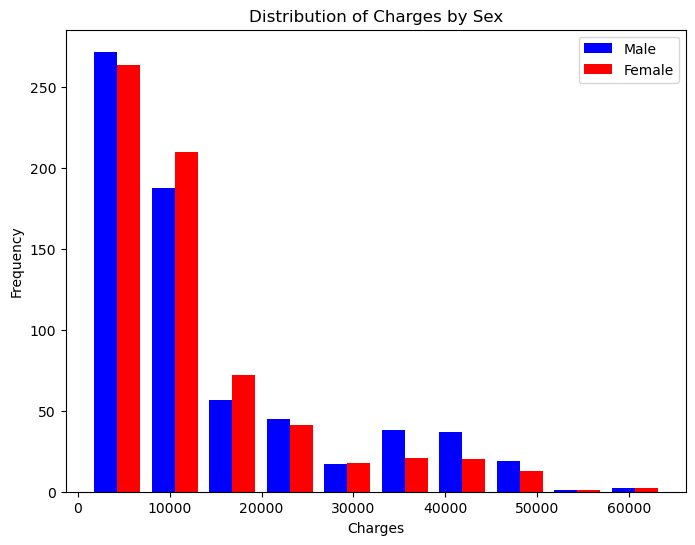

In [9]:
# Display a histogram to visualize the distribution of charges based on sex in the dataset
# Create separate DataFrames for male and female charges
male_charges = df[df["sex"] == "male"]["charges"]
female_charges = df[df["sex"] == "female"]["charges"]

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist([male_charges, female_charges], color=["blue", "red"], label=["Male", "Female"])
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.title("Distribution of Charges by Sex")
plt.legend()
plt.show()


#### Distribution of Age

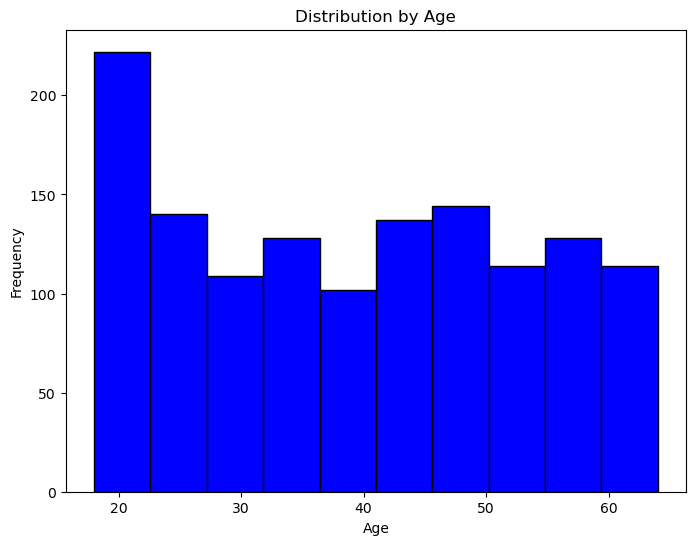

In [10]:
# Create a histogram to display the age distribution in the dataset
plt.figure(figsize= (8,6))
plt.hist(data= df, x= "age", color= "blue", edgecolor= "black")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution by Age")
plt.show()

#### Charges amount distribution per smoker

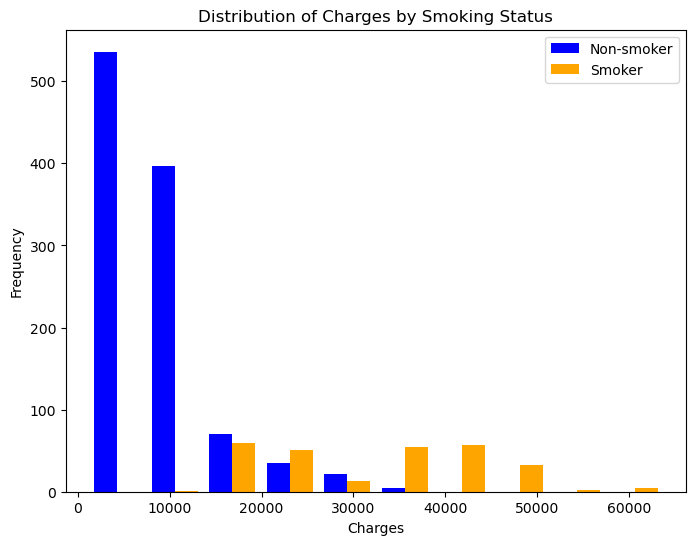

In [11]:
# Show a histogram to visualize the distribution of charges amounts based on smoking status in the dataset
# Separate charges based on smoking status
non_smoker_charges = df[df["smoker"] == "no"]["charges"]
smoker_charges = df[df["smoker"] == "yes"]["charges"]

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist([non_smoker_charges, smoker_charges], color=["blue", "orange"], label=["Non-smoker", "Smoker"])
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.title("Distribution of Charges by Smoking Status")
plt.legend()
plt.show()

#### Average BMI per age

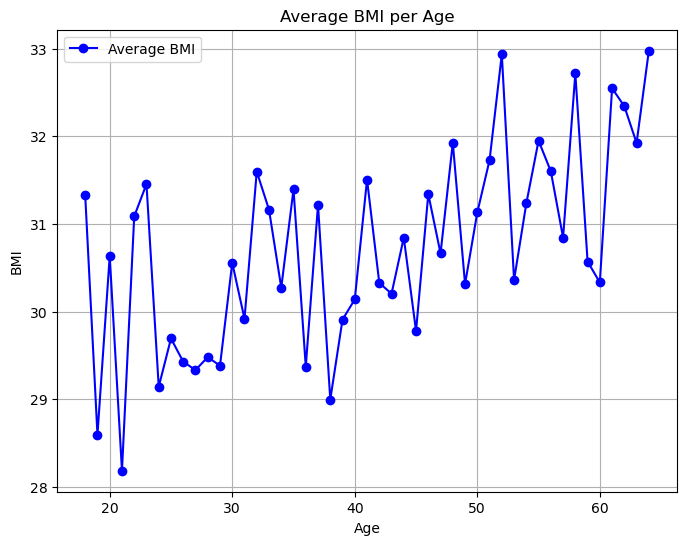

In [12]:
# Display a line plot showing the average BMI per age using markers to highlight the data points
# Calculate the average BMI per age
average_bmi = df.groupby("age")["bmi"].mean()
average_bmi

# Create the line plot
plt.figure(figsize= (8,6))
plt.plot(average_bmi.index, average_bmi.values, marker= "o", linestyle= "-", color= "b", label= "Average BMI")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.title("Average BMI per Age")
plt.grid(True)
plt.legend()
plt.show()

As we can see with time - the average BMI score starts getting higher to unhealthier ranges.

#### Age vs Charges

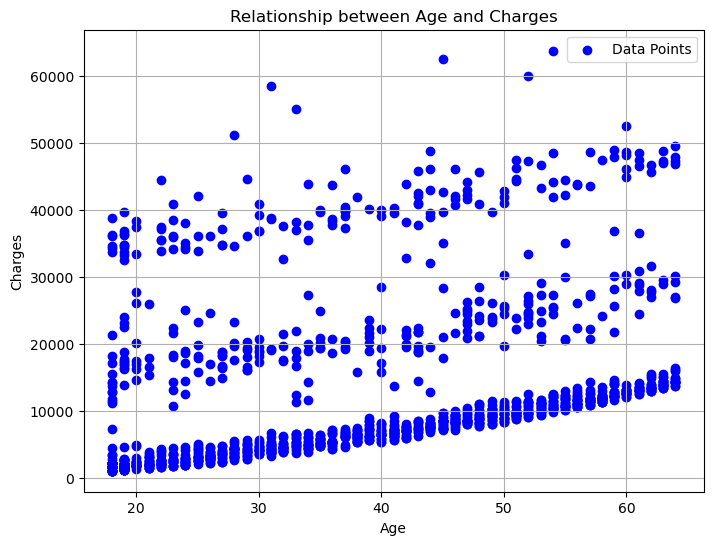

In [13]:
# Create a scatter plot to show the relationship between age and charges in the dataset.
plt.figure(figsize=(8, 6))
plt.scatter(df["age"], df["charges"], color="b", marker="o", label="Data Points")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Relationship between Age and Charges")
plt.grid(True)
plt.legend()
plt.show()

## Model Estimation

In [14]:
# write you are code here
target = 'charges'
numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker','region']

X = df[numeric_features + categorical_features]
y = df[target]

In [15]:
# Split the independenet and dependent features in to x and y variables with a test size 0.2% and random at 42
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [16]:
# Creating a column transformer named preprocessor to apply specific pipelines to numerical and categorical features separately.
preprocessor = make_column_transformer((StandardScaler(), numeric_features), (OneHotEncoder(handle_unknown= "ignore"), categorical_features))


### Using Linear Regression Model

In [17]:
# Creating a linear regression model with parallel processing enabled (-1 indicates using all available cores) for improved training efficiency.
model_linear_regression = LinearRegression(n_jobs=-1)

In [18]:
# Creating a pipeline combining preprocessing steps (imputation and encoding) with linear regression modeling.
model_pipeline = make_pipeline(
    preprocessor,  # Applying preprocessing steps
    model_linear_regression  # Training linear regression model
)

In [19]:
# Fit the model on training data
model_pipeline.fit(Xtrain, ytrain)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('linearregression', LinearRegression(n_jobs=-1))])

## Model Evaluation

In [20]:
# Make prediction on the test data
model_pipeline.predict(Xtest)

array([ 8969.55027444,  7068.74744287, 36858.41091155,  9454.67850053,
       26973.17345656, 10864.11316424,   170.28084136, 16903.45028662,
        1092.43093614, 11218.34318352, 28101.68455267,  9377.73460205,
        5263.0595179 , 38416.04221107, 40255.82339284, 37098.25353123,
       15240.39392306, 35912.88264434,  9112.52398703, 31461.92108909,
        3847.68845883, 10130.12001517,  2370.54189389,  7140.21550828,
       11301.76782638, 12961.65366224, 14509.47251876,  6159.8976107 ,
        9963.85857263,  2177.85718217,  9115.93673493, 13073.68932159,
        4561.82376202,  3408.20756033,  4459.81359745, 13032.06505076,
        1979.99357292,  8813.28303302, 33271.29124448, 32585.51583927,
        3908.76090964,  4326.10774721, 14142.81326533, 11423.45494846,
        8774.13955311, 12097.28051001,  5281.57353499,  3150.5596042 ,
       35494.46461214,  9150.1124786 , 15836.84575621,  2343.57470069,
       12364.78414194,  1482.29488266, 13389.06105161, 12573.57395972,
      

In [21]:
# Evaluate the model performance using RMSE
print(f"RMSE: {mean_squared_error(ytest, model_pipeline.predict(Xtest), squared=False)}")

RMSE: 5796.284659276274


In [22]:
# Evaluate the model performance using R-squared
print(f"R-squared: {r2_score(ytest, model_pipeline.predict(Xtest))}")

R-squared: 0.7835929767120722


## Serialization

In [23]:
# Display information about the scikit-learn package
!pip show scikit-learn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\Users\egwuc\anaconda3\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: imbalanced-learn


In [24]:
%%writefile requirements.txt
scikit-learn==1.2.2

Overwriting requirements.txt


In [25]:
%%writefile train.py
import pandas as pd
import joblib

from sklearn.datasets import fetch_openml

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Read the data
df = pd.read_csv("insurance.csv")

target = 'charges'
numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker','region']

print("Creating data subsets")

X = df[numeric_features + categorical_features]
y = df[target]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = make_column_transformer((StandardScaler(), numeric_features), (OneHotEncoder(handle_unknown='ignore'), categorical_features))

model_linear_regression = LinearRegression(n_jobs=-1)

print("Estimating Model Pipeline")

model_pipeline = make_pipeline(
    preprocessor,
    model_linear_regression
)

model_pipeline.fit(Xtrain, ytrain)

print("Logging Metrics")
print(f"R-squared: {r2_score(ytest, model_pipeline.predict(Xtest))}")

print("Serializing Model")

saved_model_path = "model.joblib"

joblib.dump(model_pipeline, saved_model_path)

Overwriting train.py


In [26]:
# Execute the training script
!python train.py

Creating data subsets
Estimating Model Pipeline
Logging Metrics
R-squared: 0.7835929767120722
Serializing Model


## Test Predictions

In [27]:
# write you are code here
saved_model = joblib.load("model.joblib")

In [28]:
saved_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('linearregression', LinearRegression(n_jobs=-1))])

In [29]:
saved_model.predict(Xtest)

array([ 8969.55027444,  7068.74744287, 36858.41091155,  9454.67850053,
       26973.17345656, 10864.11316424,   170.28084136, 16903.45028662,
        1092.43093614, 11218.34318352, 28101.68455267,  9377.73460205,
        5263.0595179 , 38416.04221107, 40255.82339284, 37098.25353123,
       15240.39392306, 35912.88264434,  9112.52398703, 31461.92108909,
        3847.68845883, 10130.12001517,  2370.54189389,  7140.21550828,
       11301.76782638, 12961.65366224, 14509.47251876,  6159.8976107 ,
        9963.85857263,  2177.85718217,  9115.93673493, 13073.68932159,
        4561.82376202,  3408.20756033,  4459.81359745, 13032.06505076,
        1979.99357292,  8813.28303302, 33271.29124448, 32585.51583927,
        3908.76090964,  4326.10774721, 14142.81326533, 11423.45494846,
        8774.13955311, 12097.28051001,  5281.57353499,  3150.5596042 ,
       35494.46461214,  9150.1124786 , 15836.84575621,  2343.57470069,
       12364.78414194,  1482.29488266, 13389.06105161, 12573.57395972,
      

# Gradio Interface

In [30]:
%%writefile app.py
import os
import uuid
import joblib
import json

import gradio as gr
import pandas as pd

from huggingface_hub import CommitScheduler
from pathlib import Path

# Run the training script placed in the same directory as app.py
# The training script will train and persist a logistic regression
# model with the filename 'model.joblib'
os.system("python train.py")

# Load the freshly trained model from disk
insurance_charge_predictor = joblib.load('model.joblib')

# Prepare the logging functionality
log_file = Path("logs/") / f"data_{uuid.uuid4()}.json"
log_folder = log_file.parent

scheduler = CommitScheduler(
    repo_id="insurance-charge-mlops-logs",
    repo_type="dataset",
    folder_path=log_folder,
    path_in_repo="data",
    every=2
)

# Define the predict function that runs when 'Submit' is clicked or when a API request is made
def predict_insurance_charge(age, bmi, children, sex, smoker, region):
    sample = {
        'age': age,
        'bmi': bmi,
        'children': children,
        'sex': sex,
        'smoker': smoker,
        'region': region
    }

    data_point = pd.DataFrame([sample])
    prediction = insurance_charge_predictor.predict(data_point).tolist()

    # While the prediction is made, log both the inputs and outputs to a local log file
    # While writing to the log file, ensure that the commit scheduler is locked to avoid parallel
    # access

    with scheduler.lock:
        with log_file.open("a") as f:
            f.write(json.dumps(
                {
                    'age': age,
                    'bmi': bmi,
                    'children': children,
                    'sex': sex,
                    'smoker': smoker,
                    'region': region,
                    'prediction': prediction[0]
                }
            ))
            f.write("\n")

    return round(prediction[0],2)

# Set up UI components for input and output

age_input = gr.Number(label='Age')
bmi_input = gr.Number(label='BMI')
children_input = gr.Number(label='Children')
sex_input = gr.Dropdown(['female','male'],label='Sex')
smoker_input = gr.Dropdown(['yes','no'],label='Smoker')
region_input = gr.Dropdown(['southeast', 'southwest', 'northwest', 'northeast'], label='Region')

model_output = gr.Label(label="Charges")

# Create the interface
demo = gr.Interface(
    fn=predict_insurance_charge,
    inputs=[age_input, bmi_input, children_input,sex_input, smoker_input, region_input],
    outputs=model_output,
    title="HealthyLife Insurance Charge Prediction",
    description="This API allows you to predict the insurance charges based on key customer attributes.",
    concurrency_limit=16
)

# Launch with a load balancer
demo.queue()
demo.launch(share=False)

Overwriting app.py


# Online/Batch Inferencing

### Paste your gradio app link

*   https://huggingface.co/spaces/Benjnr1000/mlops_with_python

Note: Make sure your Hugging Face space repository is set to public. If it's private, the evaluator won't be able to access the app you've built, which could result in losing marks.

In [31]:
# Install the gradio_client package silently
!pip install -q gradio_client

In [32]:
# import the libraries
import time  # Import the time module for time-related functions
from gradio_client import Client  # Import the Gradio client for interacting with Gradio interfaces
from sklearn.datasets import fetch_openml  # Import fetch_openml to fetch datasets
from sklearn.model_selection import train_test_split  # Import train_test_split for splitting datasets
from tqdm import tqdm  # Import tqdm for progress bars

## Test Data

In [33]:
# Read the dataset from the CSV file into a DataFrame
df = pd.read_csv("insurance.csv")

# Define the target variable
target = 'charges'

# Define the numeric features used for modeling
numeric_features = ['age', 'bmi', 'children']

# Define the categorical features used for modeling
categorical_features = ['sex', 'smoker', 'region']

# Separate features (X) and target variable (y)
X = df.drop('charges', axis=1)
y = df['charges']

# Display a message indicating the creation of data subsets
print("data subsets are being created")

# Split the dataset into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

data subsets are being created


In [34]:
# Check the shape of the testing features dataset
Xtest.shape

(268, 7)

In [35]:
# Display the first 3 rows of the testing features dataset
Xtest.head(3)

,index,age,sex,bmi,children,smoker,region
764,764,45,female,25.175,2,no,northeast
887,887,36,female,30.020,0,no,northwest
890,890,64,female,26.885,0,yes,northwest


In [37]:
Xtest = Xtest[['age', 'bmi', 'children', 'sex', 'smoker', 'region']]

In [38]:
# Retrieve the values of a specific row (index 764) from the testing features dataset and convert them to a list
Xtest.loc[764].tolist()

[45, 25.175, 2, 'female', 'no', 'northeast']

In [39]:
# Randomly sample 100 rows from the testing features dataset
Xtest_sample = Xtest.sample(100)

In [40]:
# Convert the sampled rows from the DataFrame to a list of tuples
Xtest_sample_rows = list(Xtest_sample.itertuples(index= False, name= None))

In [41]:
# Access the first tuple in the list of sampled rows
Xtest_sample_rows[0]

(31, 25.935, 1, 'male', 'no', 'northwest')

## Inference

In [42]:
# Create a Gradio client instance for the specified Gradio interface
client = Client("Benjnr1000/mlops_with_python")

Loaded as API: https://benjnr1000-mlops-with-python.hf.space ✔


## Online/Real time

In [43]:
# Submit a single data point prediction request to the Gradio interface
job = client.predict(
    age = 45,
    bmi = 25,
    children = 4,
    sex = "female",
    smoker = "no",
    region = "southeast",
    api_name = "/predict"
)

In [44]:
# Print the result of the prediction job
print(job)

{'label': '9103.25', 'confidences': None}


## Batch

In [45]:
# Initialize an empty list to store batch predictions
batch_predictions = []

In [46]:
# Iterate through the sampled rows and submit prediction requests to the Gradio interface
# Store the results in batch_predictions list
for row in tqdm(Xtest_sample_rows):
    try:
        # Submit a prediction request for the current row
        job = client.submit(
            age = row[0],
            bmi = row[1],
            children = row[2],
            sex = row[3],
            smoker = row[4],
            region = row[5],
            api_name = "/predict"
        )

        # Wait for the job to complete and get the result
        prediction = job.result()['label']
        # Append the prediction result to batch_predictions
        batch_predictions.append(int(round(float(prediction))))

        # Sleep for 1 second before processing the next row
        time.sleep(1)

    except Exception as e:
        # Print any exceptions that occur during the prediction
        print(e)


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [06:22<00:00,  3.83s/it]


In [47]:
# Display the first 10 predictions from the batch_predictions list
batch_predictions[0:10]

[4814, 10864, 1536, 9231, 1684, 10184, 26973, 13230, 12319, 12097]

# Unit Testing

## Setup

In [48]:
# Install the gradio_client package silently using pip
!pip install -q gradio_client

In [49]:
# import the required libraries
from gradio_client import Client  # Import the Gradio client for interacting with Gradio interfaces
from sklearn.model_selection import train_test_split  # Import train_test_split for splitting datasets
from sklearn.metrics import classification_report  # Import classification_report for model evaluation
from tqdm import tqdm  # Import tqdm for progress bars

In [50]:
client = Client("Benjnr1000/mlops_with_python")

Loaded as API: https://benjnr1000-mlops-with-python.hf.space ✔


## Baseline Checks

Test Data

In [51]:
# Read the insurance dataset from a CSV file into a DataFrame
df = pd.read_csv('insurance.csv')

# Define the target variable and features
target = 'charges'
numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

# Display a message indicating the creation of data subsets
print('Creating data subsets')

# Create feature matrix (X) and target vector (y)
X = df.drop('charges', axis=1)
y = df['charges']

# Split the dataset into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

Xtest = Xtest[['age', 'bmi', 'children', 'sex', 'smoker', 'region']]

# Sample 100 rows from the testing set for evaluation
Xtest_sample = Xtest.sample(100)
ytest_sample = ytest.loc[Xtest_sample.index]

# Convert the sampled test set into a list of tuples
Xtest_sample_rows = list(Xtest_sample.itertuples(index=False, name=None))

Creating data subsets


Predictions on the test data

In [52]:
# Initialize an empty list to store baseline test predictions
baseline_test_predictions = []

# Iterate through the sampled rows and submit prediction requests to the Gradio interface
for row in tqdm(Xtest_sample_rows):
    try:
        # Submit a prediction request for the current row
        job = client.submit(
            age = row[0],
            bmi = row[1],
            children = row[2],
            sex = row[3],
            smoker = row[4],
            region = row[5],
            api_name = "/predict"
        )

        # Get the prediction result and append it to baseline_test_predictions
        prediction = job.result()['label']
        baseline_test_predictions.append(int(round(float(prediction))))
        # baseline_test_predictions.append(int(prediction))

    except Exception as e:
        # Print any exceptions that occur during prediction
        print(e)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [04:43<00:00,  2.84s/it]


Estimation of accuracy on the test sample. use RMSE and R-squared to measure the performance of the model

In [53]:
print(f"RMSE: {mean_squared_error(ytest_sample, baseline_test_predictions, squared=False)}")

RMSE: 5698.160519282826


In [54]:
print(f"R-squared: {r2_score(ytest_sample, baseline_test_predictions)}")

R-squared: 0.7514341530312874


If the Mean Absolute Error (MAE) or Root Mean Square Error (RMSE) is lower than the existing baseline (human or a previous model version), we move on to unit tests.

## Unit Tests

### Perturbation tests

*Baseline*

In [55]:
job = client.submit(
    age = 39,
    bmi = 20,
    children = 2,
    sex = "male",
    smoker = "no",
    region = "southwest",
    api_name = "/predict"
)

In [56]:
print(job.result()['label'])

4854.85


*Test (perturbed baseline)*

In [57]:
job = client.submit(
    age = 41,
    bmi = 20,
    children = 2,
    sex = "male",
    smoker = "no",
    region = "southwest",
    api_name = "/predict"
)

In [58]:
print(job.result()['label'])

5368.8


### Known edge-cases (criticial subgroups)

In this scenario, a known edge case is that when a person is smoker , the insurance charge should be high. Let us see if the model can recognize this state.

In [59]:
job = client.submit(
    age = 41,
    bmi = 20,
    children = 2,
    sex = "male",
    smoker = "yes",
    region = "southwest",
    api_name = "/predict"
)

In [60]:
print(job.result()['label'])

29019.93


If the unit tests pass, the model is ready to be tagged for release to staging and production.

# Identify the driftness in model and data

## Setup

In [62]:
# !pip install -q datasets
!pip install -q datasets

In [63]:
# import the required libraries
import math

import matplotlib.pyplot as plt
import seaborn as sns

from datasets import load_dataset

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

sns.set_context('talk')

## Monitoring Setup

## Access Training Data

In [64]:
# Read the insurance dataset from a CSV file into a DataFrame
df = pd.read_csv("insurance.csv")

# Define the target variable
target = "charges"

# Define the numeric features used for modeling
numeric_features = ["age", "bmi", "children"]

# Define the categorical features used for modeling
categorical_features = ["sex", "smoker", "region"]

# Print a message indicating that data subsets are being created
print("Creating data subsets")

# Create a variable X by combining numeric and categorical features
X = df.drop('charges', axis= 1)

# Create the target variable y
y = df['charges']

# Split the data into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

Xtest = Xtest[['age', 'bmi', 'children', 'sex', 'smoker', 'region']]

Creating data subsets


## Access Logs

We connect to the dataset of all the production logs and extract a 30% random sample to execute the monitoring workflow.

In [65]:
prediction_logs = load_dataset("Benjnr1000/insurance-charge-mlops-logs")

Generating train split: 0 examples [00:00, ? examples/s]

In [66]:
# Convert the 'train' logs from a Dask DataFrame to a Pandas DataFrame
prediction_logs_df = prediction_logs['train'].to_pandas()

In [67]:
# Sample 30% of the rows from the prediction logs DataFrame with a random state 42
prediction_logs_sample_df = prediction_logs_df.sample(frac=0.3, random_state=42)

In [68]:
# print the 5 sample data points
prediction_logs_sample_df.sample(5)

,age,bmi,children,sex,smoker,region,prediction
174,26,30.875,2,male,no,northwest,5619.170392
76,63,36.300,0,female,no,southeast,15836.845756
155,46,32.300,2,female,no,northeast,11628.310413
96,57,23.980,1,female,no,southeast,10567.290065
132,60,18.335,0,female,no,northeast,9667.915240


## Model Drift Checks

### Predicted Targets vs Training Targets

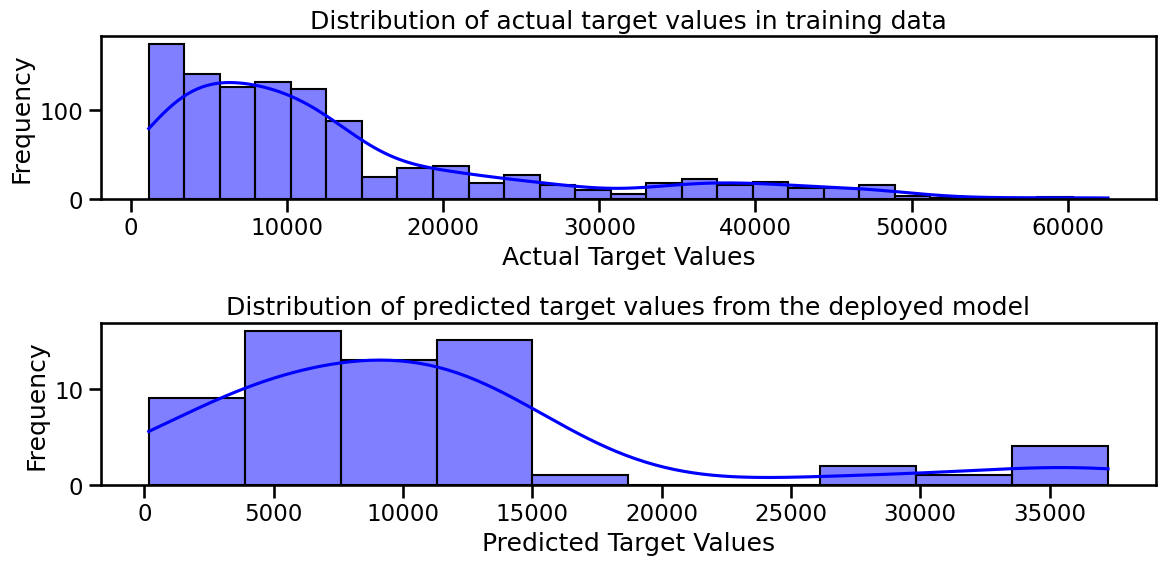

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distributions of actual target values and predicted values
plt.figure(figsize=(12, 6))

plt.subplot(211)
# Plot the histogram with a KDE (Kernel Density Estimation) curve
# write your code here
sns.histplot(x=ytrain, kde= True, color='blue')
plt.title("Distribution of actual target values in training data")
plt.xlabel("Actual Target Values")
plt.ylabel("Frequency")

# Distribution of predicted target values from the deployed model
plt.subplot(212)
# Plot a histogram with a KDE (Kernel Density Estimation) curve for the predicted values from the sample prediction logs DataFrame
# write your code here
sns.histplot(prediction_logs_sample_df.prediction, kde= True, color='blue')
plt.title("Distribution of predicted target values from the deployed model")
plt.xlabel("Predicted Target Values")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [70]:
# Calculate mean of actual values in training data (sum(target y) / len(target y))
mean_training_data = (sum(ytrain) / len(ytrain))

In [71]:
# Calculate mean of predicted values in sample logs (sum(logs.prediction) / len(logs.prediction))
mean_sample_logs = sum(prediction_logs_sample_df.prediction) / len(prediction_logs_sample_df.prediction)

In [72]:
# Calculate variance of actual values in training data
variance = sum((y - mean_training_data)**2 for y in ytrain) / len(ytrain)

In [73]:
# Calculate absolute difference between means
diff = abs(mean_training_data - mean_sample_logs)

In [74]:
# Check for model drift
if diff > 2 * math.sqrt(variance):
    print("Model Drift Detected!")
else:
    print("No Model Drift!")

No Model Drift!


## Data Drift Checks

### Live Features vs Training Features

In [75]:
mean_age_training_data = Xtrain['age'].mean()
std_age_training_data = Xtrain['age'].std()

mean_age_sample_logs = prediction_logs_sample_df['age'].mean()

In [76]:
(mean_age_training_data, mean_age_sample_logs)

(39.357009345794395, 41.98360655737705)

In [77]:
mean_feature_training_data = 39.35
mean_feature_sample_logs = 37.04
std_feature_training_data = 14.07

mean_diff = abs(mean_age_training_data - mean_age_sample_logs)

if mean_diff > 2 * std_feature_training_data:
    print("Data Drift Detected!")
else:
    print("No Data Drift!")

No Data Drift!


The current model stays in production unless we detect model drift or data drift.

# Convert ipynb to HTML

Instructions:
1. Go to File
2. Download these current working Notebook in to ipynb format
3. Now, run the below code, select the notebook from local where you downloaded the file
4. Wait for few sec, your notebook will automatically converted in to html format and save in your local pc


In [ ]:
# @title HTML Convert
# Upload ipynb
from google.colab import files
f = files.upload()

# Convert ipynb to html
import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# download the html
files.download(file0[:-5]+"html")


## Power Ahead!